Projeto de Análise de Dados
Desenvolvido por [Ian Rodrigues dos Reis Paixão]
Este notebook foi criado por [Ian Rodrigues dos Reis Paixão]
Data de Criação: [30/12/2024]
Contato: [iang.master100@gmail.com]

O problema envolve analisar dados de avaliações de produtos, considerando tanto os sentimentos dos usuários quanto a distribuição geográfica e de categorias dos produtos. O código aborda esse problema gerando um conjunto de dados simulado com avaliações que incluem textos, cidades, produtos e pontuações, enquanto introduz erros aleatórios nos textos. Para resolver isso, o código trata os erros, removendo a palavra "Erro!" nos textos, e realiza uma análise de sentimentos utilizando a ferramenta VADER, ajustando os resultados com base na pontuação da avaliação. Além disso, o código gera gráficos para analisar a distribuição de avaliações por cidade, produto e categoria, utilizando diferentes paletas de cores para melhorar a visualização. Assim, o código oferece uma análise detalhada e precisa, tanto dos sentimentos quanto da distribuição geográfica e de categorias dos produtos.

                                               Texto          Cidade  \
0                 Bom Câmera de categoria Alimentos.        Salvador   
1        Bom Notebook de categoria Eletrodomésticos.    Porto Alegre   
2  Excelente Câmera de categoria Eletrodomésticos...    Porto Alegre   
3             Excelente Notebook de categoria Saúde.        Curitiba   
4         Péssimo Fone de Ouvido de categoria Saúde.  Rio de Janeiro   

   Pontuacao         Produto         Categoria        Data  \
0          3          Câmera         Alimentos  2024-02-22   
1          3        Notebook  Eletrodomésticos  2024-09-05   
2          5          Câmera  Eletrodomésticos  2024-10-06   
3          5        Notebook             Saúde  2024-09-16   
4          1  Fone de Ouvido             Saúde  2023-12-31   

                                   Texto_corrigido Sentimento_Analise  
0               Bom Câmera de categoria Alimentos.             Neutro  
1      Bom Notebook de categoria Eletrodomésticos.

<ipython-input-27-bf15af34e2b3>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuicao_cidades.index, y=distribuicao_cidades.values, palette='Set2')  # Usando a paleta Set2


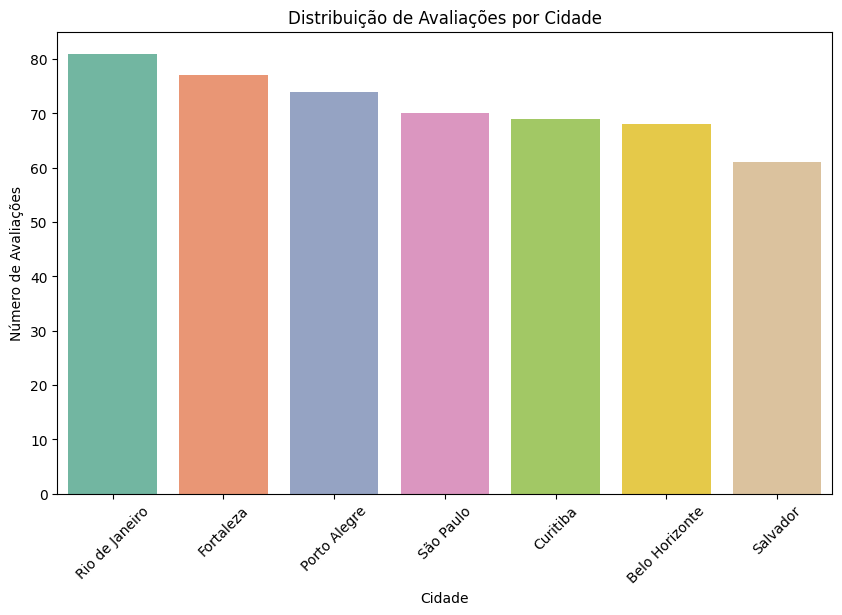

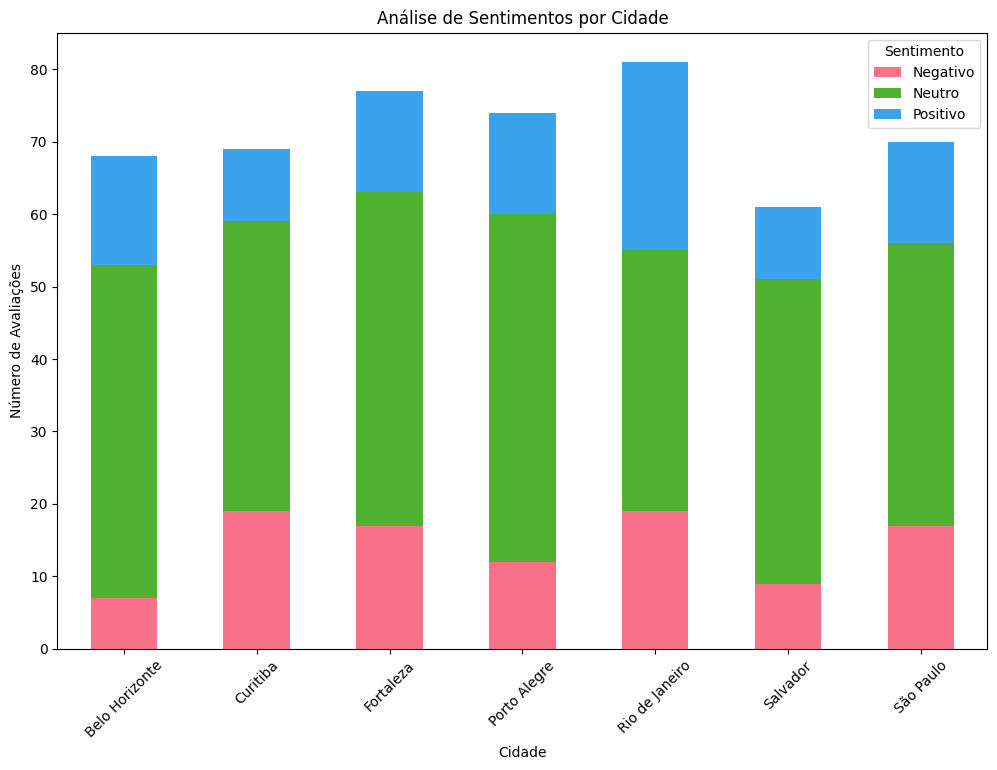

<ipython-input-27-bf15af34e2b3>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuicao_produtos.index, y=distribuicao_produtos.values, palette='coolwarm')  # Usando a paleta coolwarm


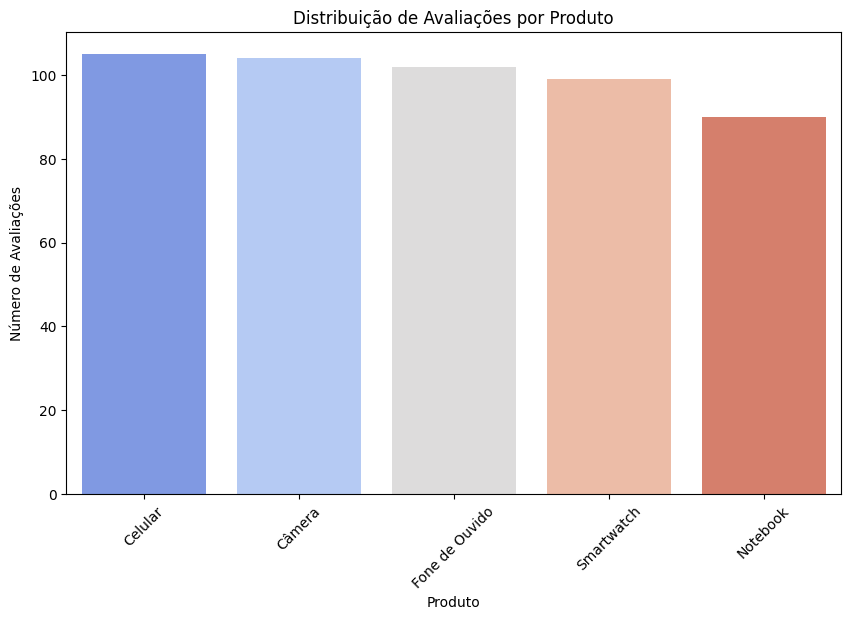

<ipython-input-27-bf15af34e2b3>:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuicao_categorias.index, y=distribuicao_categorias.values, palette='viridis')  # Usando a paleta viridis


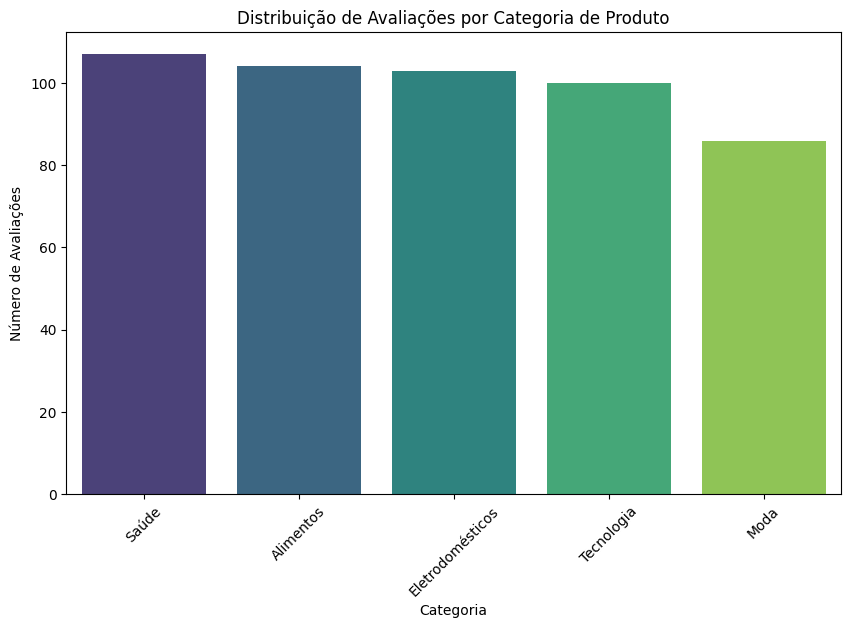

In [27]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Função para gerar dados de avaliação com e sem erros (expansão)
def gerar_dados_expandidos(n=300):
    np.random.seed(42)

    # Listas de cidades, produtos e avaliações
    cidades = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Porto Alegre', 'Fortaleza', 'Salvador']
    produtos = ['Celular', 'Notebook', 'Smartwatch', 'Câmera', 'Fone de Ouvido']
    categorias = ['Tecnologia', 'Moda', 'Eletrodomésticos', 'Saúde', 'Alimentos']

    # Gerando dados com e sem erros
    dados = []
    for _ in range(n):
        cidade = np.random.choice(cidades)
        produto = np.random.choice(produtos)
        categoria = np.random.choice(categorias)
        pontuacao = np.random.randint(1, 6)  # Avaliação de 1 a 5
        sentimento_texto = "Excelente" if pontuacao > 3 else "Péssimo" if pontuacao == 1 else "Bom"
        texto = f"{sentimento_texto} {produto} de categoria {categoria}."

        # Introduzindo erros aleatórios
        if np.random.rand() > 0.85:  # 15% chance de erro
            texto = texto + " Erro!"

        # Adicionando data aleatória
        data = datetime.now() - timedelta(days=random.randint(0, 365))
        data_str = data.strftime('%Y-%m-%d')

        dados.append([texto, cidade, pontuacao, produto, categoria, data_str])

    # Convertendo em um DataFrame
    df = pd.DataFrame(dados, columns=["Texto", "Cidade", "Pontuacao", "Produto", "Categoria", "Data"])

    return df

# Função para análise de sentimentos usando VADER com ajustes baseados na pontuação
def analise_sentimentos_vader(df):
    sid = SentimentIntensityAnalyzer()

    def calcular_sentimento_vader(texto, pontuacao):
        # Calculando a pontuação de sentimento com VADER
        sentimento = sid.polarity_scores(texto)
        if sentimento['compound'] >= 0.05:
            return "Positivo"
        elif sentimento['compound'] <= -0.05:
            return "Negativo"
        else:
            return "Neutro"

    # Ajustando a análise de sentimentos com base na pontuação
    def ajustar_sentimento(row):
        sentimento = calcular_sentimento_vader(row['Texto'], row['Pontuacao'])
        # Considera a pontuação para garantir que avaliações de 1 ou 5 sejam corretamente classificadas
        if row['Pontuacao'] == 1 and sentimento != "Negativo":
            return "Negativo"
        elif row['Pontuacao'] == 5 and sentimento != "Positivo":
            return "Positivo"
        else:
            return sentimento

    # Aplicando a função em cada linha
    df['Sentimento_Analise'] = df.apply(ajustar_sentimento, axis=1)
    return df

# Função para tratar erros nos textos (remover a palavra "Erro!" e corrigir pontuação)
def tratar_erros(df):
    def corrigir_texto(texto):
        return texto.replace(" Erro!", "")

    # Corrigindo os textos com erro
    df['Texto_corrigido'] = df['Texto'].apply(corrigir_texto)
    return df

# Função para análise geográfica (distribuição de avaliações por cidade)
def analise_geografica(df):
    # Contagem de avaliações por cidade
    distribuicao_cidades = df['Cidade'].value_counts()

    # Plotando gráfico de barras com mais cores
    plt.figure(figsize=(10, 6))
    sns.barplot(x=distribuicao_cidades.index, y=distribuicao_cidades.values, palette='Set2')  # Usando a paleta Set2
    plt.title('Distribuição de Avaliações por Cidade')
    plt.xlabel('Cidade')
    plt.ylabel('Número de Avaliações')
    plt.xticks(rotation=45)
    plt.show()

# Função para análise de sentimentos por cidade
def analise_sentimentos_por_cidade(df):
    sentimentos_por_cidade = df.groupby('Cidade')['Sentimento_Analise'].value_counts().unstack().fillna(0)

    # Plotando gráfico de barras com mais cores
    ax = sentimentos_por_cidade.plot(kind='bar', stacked=True, figsize=(12, 8), color=sns.color_palette('husl', 3))
    plt.title('Análise de Sentimentos por Cidade')
    plt.xlabel('Cidade')
    plt.ylabel('Número de Avaliações')
    plt.xticks(rotation=45)
    plt.legend(title='Sentimento')
    plt.show()

# Função para análise de produtos
def analise_produtos(df):
    distribuicao_produtos = df['Produto'].value_counts()

    # Plotando gráfico de barras com mais cores
    plt.figure(figsize=(10, 6))
    sns.barplot(x=distribuicao_produtos.index, y=distribuicao_produtos.values, palette='coolwarm')  # Usando a paleta coolwarm
    plt.title('Distribuição de Avaliações por Produto')
    plt.xlabel('Produto')
    plt.ylabel('Número de Avaliações')
    plt.xticks(rotation=45)
    plt.show()

# Função para análise de categorias
def analise_categorias(df):
    distribuicao_categorias = df['Categoria'].value_counts()

    # Plotando gráfico de barras com mais cores
    plt.figure(figsize=(10, 6))
    sns.barplot(x=distribuicao_categorias.index, y=distribuicao_categorias.values, palette='viridis')  # Usando a paleta viridis
    plt.title('Distribuição de Avaliações por Categoria de Produto')
    plt.xlabel('Categoria')
    plt.ylabel('Número de Avaliações')
    plt.xticks(rotation=45)
    plt.show()

# Gerando dados com erros
df_expandidos = gerar_dados_expandidos(500)

# Tratando os erros nos textos
df_tratado = tratar_erros(df_expandidos)

# Realizando análise de sentimentos com VADER ajustado
df_sentimentos = analise_sentimentos_vader(df_tratado)

# Exibindo as primeiras linhas do DataFrame com análise de sentimentos
print(df_sentimentos.head())

# Analisando a distribuição geográfica
analise_geografica(df_sentimentos)

# Analisando os sentimentos por cidade
analise_sentimentos_por_cidade(df_sentimentos)

# Analisando a distribuição de produtos
analise_produtos(df_sentimentos)

# Analisando a distribuição de categorias
analise_categorias(df_sentimentos)
